# Quantum Feature Selection 

## Libraries

In [5]:
import pennylane as qml 
from pennylane import numpy as np

## Variables

In [40]:
num_qubits = 8 #8
dev = qml.device('lightning.qubit', wires = num_qubits, shots=10000) # lightning.qubit
theta = np.array(list(range(4*num_qubits)))/(2*num_qubits)

In [7]:
theta

tensor([0.    , 0.0625, 0.125 , 0.1875, 0.25  , 0.3125, 0.375 , 0.4375,
        0.5   , 0.5625, 0.625 , 0.6875, 0.75  , 0.8125, 0.875 , 0.9375,
        1.    , 1.0625, 1.125 , 1.1875, 1.25  , 1.3125, 1.375 , 1.4375,
        1.5   , 1.5625, 1.625 , 1.6875, 1.75  , 1.8125, 1.875 , 1.9375], requires_grad=True)

In [8]:
#@qml.qnode(dev)
def ansatz(theta:list, num_qubits=10, depth=1):
    '''
    
    '''
    
    for i in range(num_qubits):
        qml.RY(theta[i], wires=i)
    for i in range(num_qubits-1):
        qml.CNOT([i,i+1])
    for i in range(num_qubits):
        qml.RY(theta[i+num_qubits], wires=i)

    if depth==2:
        for i in range(num_qubits):
            qml.RY(theta[i+2*num_qubits], wires=i)
        for i in range(num_qubits-1):
            qml.CNOT([i,i+1])
        for i in range(num_qubits):
            qml.RY(theta[i+3*num_qubits], wires=i)
        #qml.RY(theta[num_qubits-1], wires=num_qubits)
    #return qml.expval(qml.PauliZ(0))



/var/folders/__/yb0d9fls4r9gb8t6yccwhq_w0000gn/T/ipykernel_56028/4102791005.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


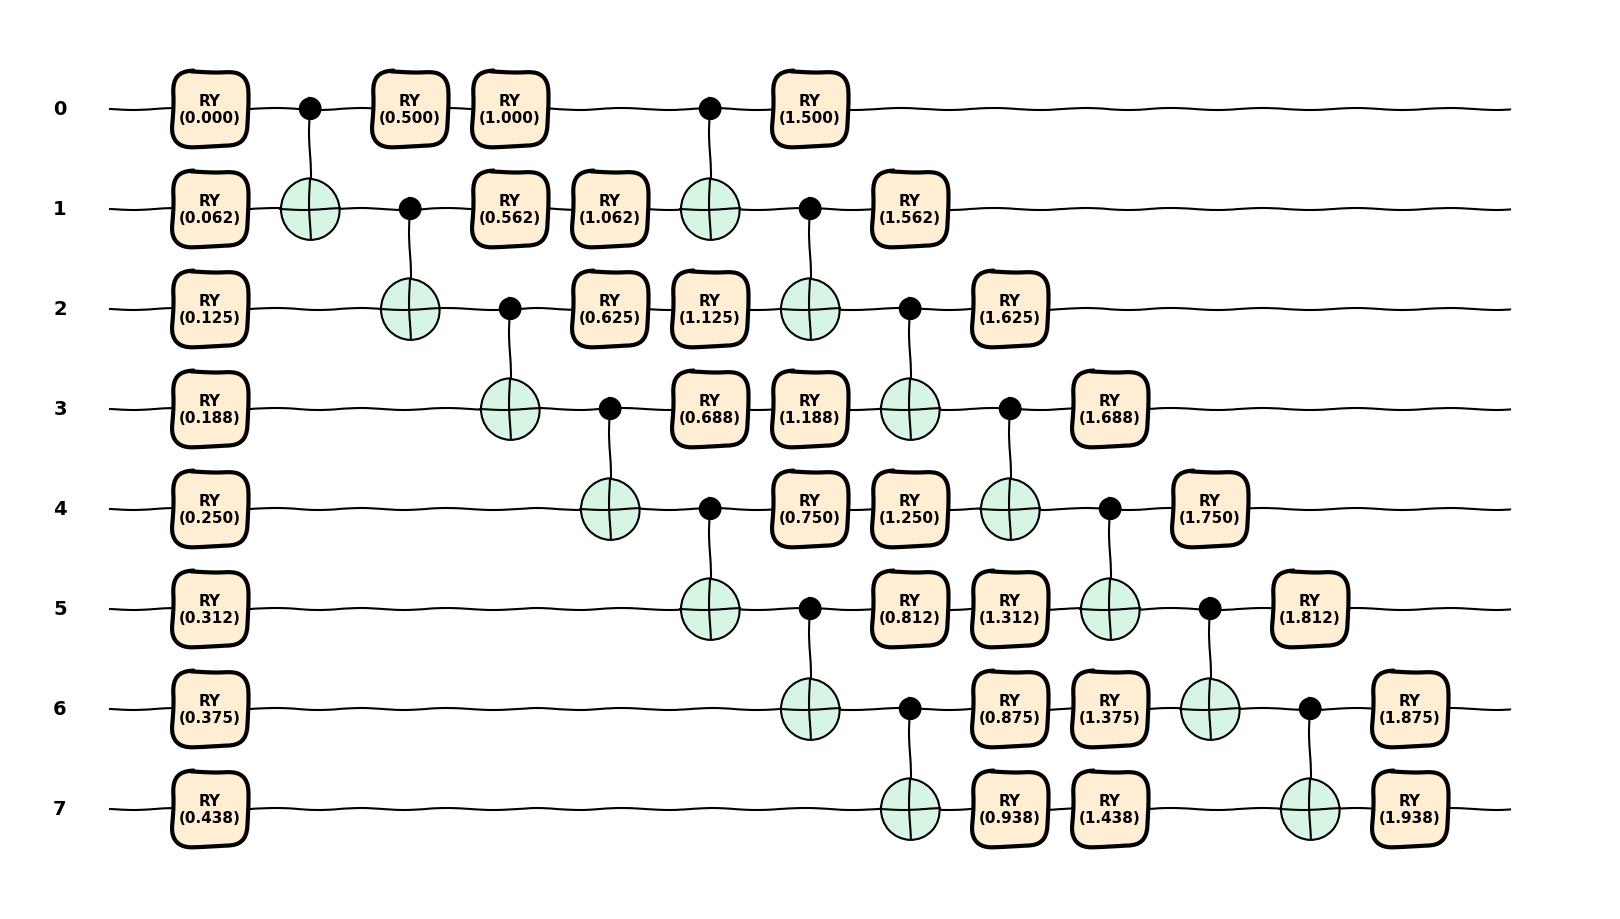

In [9]:
fig, ax = qml.draw_mpl(ansatz, style="sketch", decimals =3)(theta, num_qubits=num_qubits, depth=2)
fig.show()

## Data

In [10]:
import pandas as pd

In [4]:
data = pd.read_csv('german.data', sep = ' ')

In [5]:
data

,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1.1
0,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
1,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
2,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
3,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2
4,A14,36,A32,A46,9055,A65,A73,2,A93,A101,...,A124,35,A143,A153,1,A172,2,A192,A201,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,A14,12,A32,A42,1736,A61,A74,3,A92,A101,...,A121,31,A143,A152,1,A172,1,A191,A201,1
995,A11,30,A32,A41,3857,A61,A73,4,A91,A101,...,A122,40,A143,A152,1,A174,1,A192,A201,1
996,A14,12,A32,A43,804,A61,A75,4,A93,A101,...,A123,38,A143,A152,1,A173,1,A191,A201,1
997,A11,45,A32,A43,1845,A61,A73,4,A93,A101,...,A124,23,A143,A153,1,A173,1,A192,A201,2


In [6]:
col = [
    'Status of existing checking account',
    'Duration in month',
    'Credit history',
    'Purpose',
    'Credit amount',
    'Savings account/bonds',
    'Present employment since', 
    'Installment rate in percentage of disposable income', 
    'Personal status and sex',
    'Other debtors / guarantors',
    'Present residence since',
    'Property',
    'Age in years', 
    'Other installment plans ',
    'Housing',
    'Number of existing credits at this bank',
    'Job',
    'Number of people being liable to provide maintenance for',
    'Telephone',
    'foreign worker',
    'Class',
]

In [7]:
data.columns = col

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       999 non-null    object
 1   Duration in month                                         999 non-null    int64 
 2   Credit history                                            999 non-null    object
 3   Purpose                                                   999 non-null    object
 4   Credit amount                                             999 non-null    int64 
 5   Savings account/bonds                                     999 non-null    object
 6   Present employment since                                  999 non-null    object
 7   Installment rate in percentage of disposable income       999 non-null    int64 
 8   Personal status and sex       

## Processing

In [11]:
from sklearn.preprocessing import OneHotEncoder

In [10]:
enc = OneHotEncoder(handle_unknown='ignore')

In [11]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [12]:
X_cat = data.select_dtypes(include=['object'])

In [13]:
enc.fit(X_cat)

OneHotEncoder(handle_unknown='ignore')

In [14]:
names = list()
for i in enc.categories_:
    names.extend(i)

In [15]:
X_transform = pd.DataFrame(enc.transform(X_cat).toarray(), columns = names)

In [16]:
enc.categories_

[array(['A11', 'A12', 'A13', 'A14'], dtype=object),
 array(['A30', 'A31', 'A32', 'A33', 'A34'], dtype=object),
 array(['A40', 'A41', 'A410', 'A42', 'A43', 'A44', 'A45', 'A46', 'A48',
        'A49'], dtype=object),
 array(['A61', 'A62', 'A63', 'A64', 'A65'], dtype=object),
 array(['A71', 'A72', 'A73', 'A74', 'A75'], dtype=object),
 array(['A91', 'A92', 'A93', 'A94'], dtype=object),
 array(['A101', 'A102', 'A103'], dtype=object),
 array(['A121', 'A122', 'A123', 'A124'], dtype=object),
 array(['A141', 'A142', 'A143'], dtype=object),
 array(['A151', 'A152', 'A153'], dtype=object),
 array(['A171', 'A172', 'A173', 'A174'], dtype=object),
 array(['A191', 'A192'], dtype=object),
 array(['A201', 'A202'], dtype=object)]

In [56]:
X_transform

,A11,A12,A13,A14,A30,A31,A32,A33,A34,A40,...,A152,A153,A171,A172,A173,A174,A191,A192,A201,A202
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
995,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
996,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
997,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [17]:
data_result = pd.concat([data.select_dtypes(exclude=['object']), X_transform], axis=1)


In [58]:
data_result.head()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Class,A11,A12,...,A152,A153,A171,A172,A173,A174,A191,A192,A201,A202
0,48,5951,2,2,22,1,1,2,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,12,2096,2,3,49,1,2,1,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,42,7882,2,4,45,1,2,1,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,24,4870,3,4,53,2,2,2,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,36,9055,2,4,35,1,2,1,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [59]:
data_res = data_result[data_result.columns[:15]]

In [60]:
data_res

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,Class,A11,A12,A13,A14,A30,A31,A32
0,48,5951,2,2,22,1,1,2,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,12,2096,2,3,49,1,2,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,42,7882,2,4,45,1,2,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,24,4870,3,4,53,2,2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,36,9055,2,4,35,1,2,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,12,1736,3,4,31,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
995,30,3857,4,4,40,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0
996,12,804,4,4,38,1,1,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0
997,45,1845,4,4,23,1,1,2,1.0,0.0,0.0,0.0,0.0,0.0,1.0


## Dataset generation

In [7]:
!python3 -m pip install --upgrade scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/d7/28/dd1e6f590e17df3f186a2f8255c1f686b6c7b44fda395e94f16fb4f65db7/scikit_learn-1.4.1.post1-cp39-cp39-macosx_12_0_arm64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 7.9 MB/s eta 0:00:00m eta 0:00:010:0101
DEPRECATION: qiskit-nature 0.5.2 has a non-standard dependency specifier qiskit-terra>=0.22.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of qiskit-nature or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.0
    Uninstalling scikit-learn-1.2.0:
      Successfully uninstalled scikit-learn-1.2.0

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [42]:
from sklearn import datasets 
data = datasets.make_classification(n_samples=1000, n_features=52, n_classes=2) 

In [43]:
data

(array([[ 0.09979462,  0.8302239 , -0.89241772, ..., -0.70541667,
         -2.69022462, -1.28664754],
        [ 0.05403782,  0.1210244 , -0.16194842, ..., -0.4693846 ,
         -0.79502023, -0.33785272],
        [ 0.89927599, -0.83276148,  0.65878061, ..., -0.11021109,
         -0.08202191, -0.81927292],
        ...,
        [ 2.30072881, -0.04190621,  1.62695185, ..., -0.27164237,
          0.8616657 ,  0.40316927],
        [-0.16777718,  0.50328083,  1.27353873, ..., -1.53298192,
         -1.65299844,  0.98452361],
        [-1.09746925,  0.31054688,  1.15310878, ..., -0.60019593,
          2.96172522,  1.06707383]]),
 array([1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
        1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
        1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
   

In [44]:
#@qml.qnode(dev)
def amplitudes(f=None, num_qubits=None):
    qml.AmplitudeEmbedding(features=f, pad_with=0.,wires=range(num_qubits),normalize=True)
    #return qml.expval(qml.PauliZ(0))

In [45]:
@qml.qnode(dev, interface="autograd") # , interface="autograd"
def circuit(weights, x, num_qubits, depth):
    '''
    Parametrized circuit with data encoding (statepreparation) and layer repetition based on the weights 
    Args:
        weights: angles for the rotations (num layer, num qubits, num directions)
        x: input vector
    Return: 
        Expectation values measured on Pauli Z operators for the state 0
    '''
    # data encoding 
    amplitudes(x, num_qubits=num_qubits)

    # ansatz 
    #for W in weights:
    ansatz(weights,num_qubits=num_qubits, depth=depth)

    # measure
    return qml.expval(qml.PauliZ(0))

In [16]:
#amplitudes(data_res.to_numpy(), num_qubits=data_res.shape[1])
circuit(theta, data_res.to_numpy()[:5,:], num_qubits, 1)

NameError: name 'data_res' is not defined

In [46]:
def variational_classifier(weights, x, num_qubits, depth, bias):
    '''
    Build the parametrized circuit with weights, x and bias term
    Args:
        - weights: rotation angles 
        - bias: classical term to add more freedom to the VQA
        - x: input vector/data 
    Returns: 
        - parametrized circuit with a bias term 
    '''
    return circuit(weights, x, num_qubits, depth) + bias

In [47]:
def square_loss(labels, predictions):
    '''
    Compute the cost function
    Args:
        - labels: Ground truth
        - predictions: Predicted values 
    Returns: 
        - Mean of the square error between labels and predictions = model's error 
    '''
    
    # We use a call to qml.math.stack to allow subtracting the arrays directly
    #print(labels, predictions)
    return np.mean((labels - qml.math.stack(predictions)) ** 2)

In [48]:
def accuracy(labels, predictions):
    '''
    Compute the accuracy of the model
    Args:
        - labels: Ground truth
        - predictions: Predicted values 
    Returns: 
        - accuracy
    '''
    acc = sum(abs(l - p) < 1e-5 for l, p in zip(labels, predictions))
    acc = acc / len(labels)
    return acc

In [49]:
def cost(weights, num_qubits, depth, bias, X, Y):
    '''
    Compute the cost of the model
    Args: 
        - weights: rotation angles 
        - bias: classical term to add more freedom to the VQA
        - X: input vector/data 
        - Y: True labels 
    Returns: 
        - Error prediction / distance 
    '''
    
    predictions = [variational_classifier(weights, x, num_qubits, depth, bias)._value.tolist() for x in X]
    #print(predictions)
    return square_loss(Y, predictions)

def cost2(weights, num_qubits, depth, bias, X, Y):
    '''
    Compute the cost of the model
    Args: 
        - weights: rotation angles 
        - bias: classical term to add more freedom to the VQA
        - X: input vector/data 
        - Y: True labels 
    Returns: 
        - Error prediction / distance 
    '''
    
    predictions = [variational_classifier(weights, x, num_qubits, depth, bias) for x in X]
    #print(predictions)
    return square_loss(Y, predictions)

In [50]:
opt = qml.SPSAOptimizer(250)
#opt = qml.QNSPSAOptimizer(stepsize=5e-2) # error function as no construct 
#opt = qml.QNGOptimizer(0.01)


In [51]:
weights_init = 0.01 * np.random.randn(4*num_qubits, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)

In [23]:
Y_ * 2 - 3

NameError: name 'Y_' is not defined

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data.select_dtypes(exclude=['object']))
X_new = scaler.transform(data.select_dtypes(exclude=['object']))

In [24]:
data[0]

array([[-0.19358316, -0.29804333,  0.92623125, ...,  0.76236848,
         1.69233251,  1.61283438],
       [-1.44714814,  0.66729513, -0.41987525, ...,  1.39349688,
        -1.43692537, -0.6882095 ],
       [ 1.34874199,  1.74349542,  1.57651562, ..., -1.69656421,
         0.70100196,  0.85693065],
       ...,
       [-1.60229302,  2.4150425 ,  0.21867384, ..., -0.97235944,
         0.72434355,  0.11374635],
       [-1.43627899, -0.45116036, -0.9035487 , ..., -1.16417752,
         1.85352201, -0.82880676],
       [-0.35475445, -0.16992782,  0.15729786, ..., -2.07169002,
         0.43689171,  1.05859405]])

In [ ]:
opt = qml.SPSAOptimizer(250)
#opt = qml.NesterovMomentumOptimizer(0.5)
weights = weights_init
bias = bias_init
X_ = data[0]#np.concatenate([X_new, X_transform.to_numpy()], axis=1) #data_res.to_numpy() X_new
Y_ = data[1] #y
Y_ = Y_ * 2 - 1
depth = 2
batch_size = 5*depth #5
num_qubits = 8 #8
cost_saved = []
for it in range(250):

    # Update the weights by one optimizer step
    batch_index = np.random.randint(0, len(X_), (batch_size,))
    X_batch = X_[batch_index]
    Y_batch = Y_[batch_index]
    
    weights, _, _, bias,_,_ = opt.step(cost2, weights, num_qubits, 2, bias, X_batch, Y_batch)
    #weights, _, _, bias,_,_ = opt.step_and_cost(circuit, X_batch, weights, num_qubits, 1)
    
    #params, loss = opt.step(cost2, weights, num_qubits, 1, bias, X_batch, Y_batch)
    #print(np.sign(variational_classifier(weights, X_batch[0], num_qubits, depth, bias)))
    # Compute accuracy
    predictions = [np.sign(variational_classifier(weights, x, num_qubits, 2, bias)) for x in X_]
    #print(list(zip(Y_ , predictions)))
    acc = accuracy(Y_, predictions)
    cost_saved.append(cost2(weights, num_qubits, 2, bias, X_, Y_))
    print(
        "Iter: {:5d} | Cost: {:0.7f} | Accuracy: {:0.7f} ".format(
            it + 1, cost_saved[-1], acc
        )
    )

Iter:     1 | Cost: 1.6787847 | Accuracy: 0.5010000 
Iter:     2 | Cost: 1.3526693 | Accuracy: 0.5010000 
Iter:     3 | Cost: 1.3501620 | Accuracy: 0.5010000 
Iter:     4 | Cost: 1.1734250 | Accuracy: 0.5010000 
Iter:     5 | Cost: 1.1293848 | Accuracy: 0.5010000 
Iter:     6 | Cost: 1.0396848 | Accuracy: 0.5010000 
Iter:     7 | Cost: 1.0453942 | Accuracy: 0.5010000 
Iter:     8 | Cost: 1.0441165 | Accuracy: 0.5010000 
Iter:     9 | Cost: 1.0466771 | Accuracy: 0.5010000 
Iter:    10 | Cost: 1.0439454 | Accuracy: 0.5010000 
Iter:    11 | Cost: 1.0432010 | Accuracy: 0.5010000 
Iter:    12 | Cost: 1.0328949 | Accuracy: 0.5010000 
Iter:    13 | Cost: 1.0345201 | Accuracy: 0.5010000 
Iter:    14 | Cost: 1.0453435 | Accuracy: 0.5010000 
Iter:    15 | Cost: 1.0415832 | Accuracy: 0.5010000 
Iter:    16 | Cost: 1.0417575 | Accuracy: 0.5010000 
Iter:    17 | Cost: 1.0421434 | Accuracy: 0.5010000 
Iter:    18 | Cost: 1.0224934 | Accuracy: 0.5010000 
Iter:    19 | Cost: 1.0108811 | Accuracy: 0.50

In [ ]:
#cost_saved_spsa = cost_saved
#cost_saved_nes = cost_saved
cost_saved_nes_mix = cost_saved

In [ ]:
from matplotlib import pyplot as plt

#plt.style.use("seaborn")
plt.plot(cost_saved_spsa, "b", label="SPSA")
plt.plot(cost_saved_nes_mix, "r", label="SPSA mixed")
plt.plot(cost_saved_nes, "g", label="Nesterov")

#plt.plot(qng_cost, "g", label="Quantum natural gradient descent")

plt.ylabel("Cost function value")
plt.xlabel("Optimization steps")
plt.legend()
plt.grid(True)
plt.show()

## QNSPSA

In [28]:
opt = qml.QNSPSAOptimizer(stepsize=5e-2)
dev = qml.device("lightning.qubit", wires=num_qubits)

In [29]:

@qml.qnode(dev)
def ansatz_2(theta:list, num_qubits=10, depth=1):
    '''
    
    '''
    step = 0
    for _ in range(depth):
        for i in range(num_qubits):
            qml.RY(theta[i+step], wires=i)
        for i in range(num_qubits-1):
            qml.CNOT([i,i+1])
        for i in range(num_qubits):
            qml.RY(theta[i+step], wires=i)
        step += num_qubits
        
    #if depth==2:
    #    for i in range(num_qubits):
    #        qml.RY(theta[i+2*num_qubits], wires=i)
    #    for i in range(num_qubits-1):
    #        qml.CNOT([i,i+1])
    #    for i in range(num_qubits):
    #        qml.RY(theta[i+3*num_qubits], wires=i)
        #qml.RY(theta[num_qubits-1], wires=num_qubits)
    return qml.expval(qml.PauliZ(0))

In [30]:
depth=1
weights_init = 0.01 * np.random.randn(2*depth*num_qubits, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)

In [31]:
0.01 * np.random.randn(depth*num_qubits, requires_grad=True)

tensor([-0.00369785, -0.01744776, -0.00825224,  0.00920005,  0.01219141,
         0.01233044,  0.02157752, -0.00394352], requires_grad=True)

In [32]:
len(weights_init)

16

/var/folders/__/yb0d9fls4r9gb8t6yccwhq_w0000gn/T/ipykernel_56028/1178421244.py:2: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


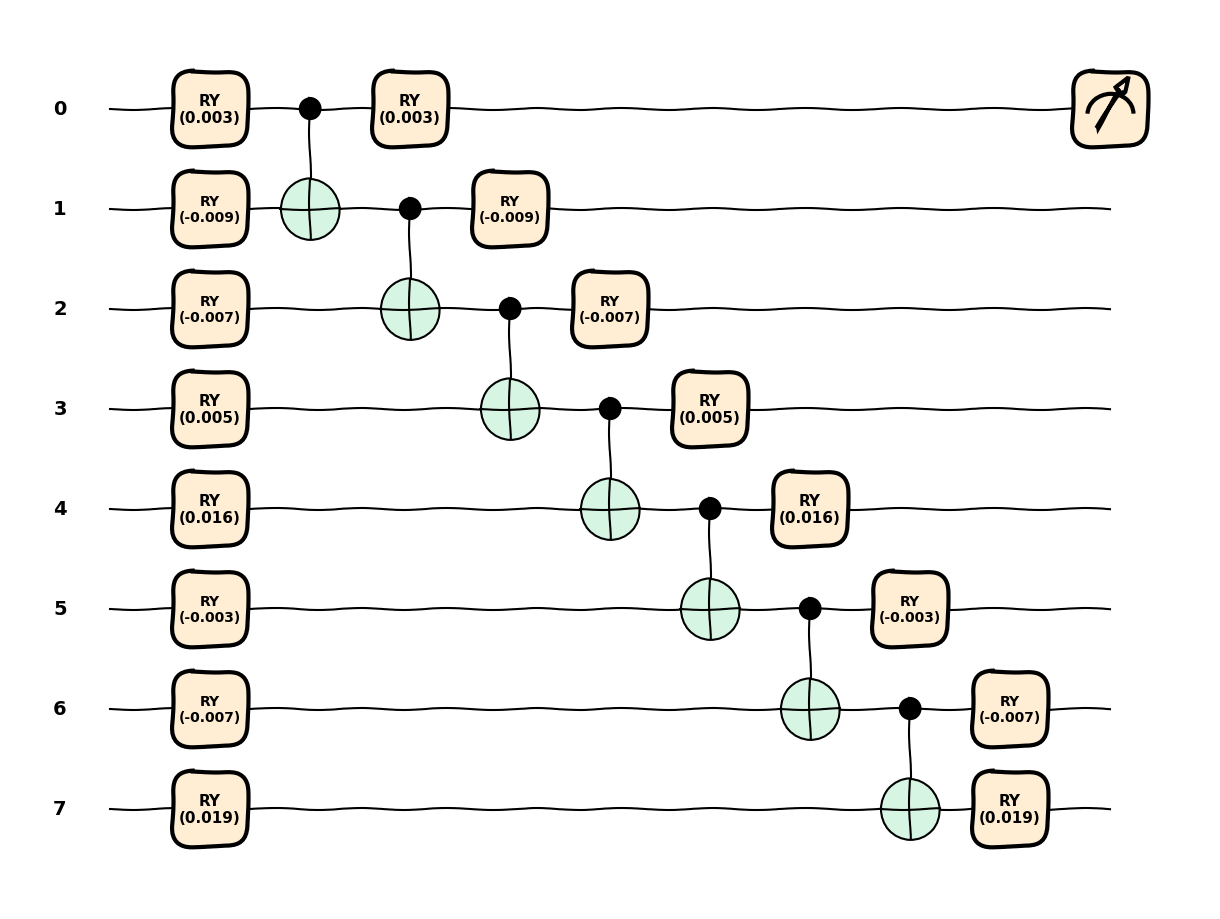

In [33]:
fig, ax = qml.draw_mpl(ansatz_2, style="sketch", decimals =3)(weights_init, num_qubits=num_qubits, depth=depth)
fig.show()

In [34]:
@qml.qnode(dev)#, interface="autograd") # , interface="autograd"
def circuit(parameters):
    '''
    Parametrized circuit with data encoding (statepreparation) and layer repetition based on the weights 
    Args:
        weights: angles for the rotations (num layer, num qubits, num directions)
        x: input vector
    Return: 
        Expectation values measured on Pauli Z operators for the state 0
    '''
    # data encoding 
    amplitudes(parameters[1], num_qubits=parameters[2])

    # ansatz 
    #for W in weights:
    ansatz_2(parameters[0],num_qubits=parameters[2], depth=parameters[3])

    # measure
    return qml.expval(qml.PauliZ(0))

In [36]:
X_ = data[0] #data_result.to_numpy() # np.concatenate([X_new, X_transform.to_numpy()], axis=1) #data_res.to_numpy() X_new
Y_ = data[1] #y
Y_ = Y_ * 2 - 1 #2 - 3


depth = 1
batch_size = 5*depth #5


weights_init = 0.01 * np.random.randn(2*depth*num_qubits, requires_grad=True)
bias_init = np.array(0.0, requires_grad=True)

weights = weights_init
bias = bias_init

num_qubits = 8 #8
cost_saved = []
for it in range(100):

    # Update the weights by one optimizer step
    batch_index = np.random.randint(0, len(X_), (batch_size,))
    X_batch = X_[batch_index]
    Y_batch = Y_[batch_index]
    
    params = (weights, X_batch, num_qubits, depth)
    params, loss = opt.step_and_cost(circuit, params)
    if i % 10 == 0:
        print(f"Step {i}: cost = {loss:.4f}")

ValueError: need at least one array to concatenate

In [77]:
print(np.shape(weights), np.shape(X_batch), num_qubits, depth)

(16,) (5, 62) 8 1


In [73]:
num_qubits = 2
dev = qml.device("default.qubit", wires=num_qubits)
@qml.qnode(dev)
def cost(params):
    qml.RX(params[0], wires=0)
    qml.CRY(params[1], wires=[0, 1])
    qml.RX(params[2], wires=0)
    qml.CRY(params[3], wires=[0, 1])
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

In [74]:
params = np.random.rand(42)
opt = qml.QNSPSAOptimizer(stepsize=5e-2)
for i in range(51):
    params, loss = opt.step_and_cost(cost, params)
    if i % 10 == 0:
        print(f"Step {i}: cost = {loss:.4f}")

Step 0: cost = 0.9642
Step 10: cost = -0.8744
Step 20: cost = -0.9915
Step 30: cost = -0.9834
Step 40: cost = -0.9888
Step 50: cost = -0.9993
